In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Final ML"


 abbreviations.xlsx	       Data_ML.xlsx   'vietnamese-stopwords (1).txt'
'Data_ML(preprocessed).xlsx'   tokenizer.pkl   word2vec_sentiment.model


In [3]:
# Import thư viện
import os
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


# Install the emoji module
!pip install emoji

# sau đó import emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import os

# Đọc file
data = pd.read_excel("/content/drive/MyDrive/Final ML/Data_ML.xlsx", engine='openpyxl')


In [5]:
# list columns
data.columns

Index(['content_ID', 'content', 'QUALITY', 'STORE', 'PRICE', 'SERVICE',
       'PACKAGING', 'OTHERS'],
      dtype='object')

In [6]:
data=data[['content_ID','content']]
# 1. Chuyển đổi thành chữ viết thường và Xóa các dòng Null trong "content_content"
# Xóa các dòng có giá trị null trong cột "content"
data = data.dropna(subset=['content'])

# Chuyển đổi nội dung trong cột "content" thành chữ thường
data['lower_content'] = data['content'].str.lower()

# Hiển thị 10 dòng đầu tiên của DataFrame
print(data.head(10))

   content_ID                                            content  \
0           0      Sản phẩm dùng rất tốt phù hợp với da mặt mình   
1           1                          Mặt nạ đắp hiệu quả thiệt   
2           2       Sử dụng dễ dàng rất thỏa mái thư giãn tột độ   
3           3                   Sản phẩm này dùng cực kỳ êm luôn   
4           4                              Sản phẩm dùng rất tốt   
5           5      Xài sạch mà không gây khô da sản phẩm rất tốt   
6           6                    Dùng combo cùng serum cực kì ổn   
7           7                              Sản phẩm tốt Hiệu quả   
8           8      Sử dụng dễ dàng rất thoải mái thư giãn tột độ   
9           9  Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...   

                                       lower_content  
0      sản phẩm dùng rất tốt phù hợp với da mặt mình  
1                          mặt nạ đắp hiệu quả thiệt  
2       sử dụng dễ dàng rất thỏa mái thư giãn tột độ  
3                   sản phẩm nà

In [7]:
# 2. Giải mã chữ viết tắt

# Đọc chữ viết tắt của tập tin
abbs_df = pd.read_excel("/content/drive/MyDrive/Final ML/abbreviations.xlsx", engine='openpyxl')
# Tạo một từ điển để ánh xạ các từ viết tắt thành ý nghĩa
abbreviation_dict = dict(zip(abbs_df['abbreviation'].astype(str), abbs_df['meaning']))

# Chức năng giải mã abbs
def decode_abbreviations(text, abbreviation_dict):
    # Kiểm tra nếu text là string trước khi xử lý
    if isinstance(text, str):
        # Tìm kiếm các chữ viết tắt trong văn bản và thay thế chúng
        # với ý nghĩa tương ứng của chúng từ từ điển
        for abbreviation, meaning in abbreviation_dict.items():
            text = re.sub(r'\b' + re.escape(abbreviation) + r'\b', meaning, text)
        return text
    else:
        # Nếu không phải string, trả về giá trị gốc hoặc xử lý theo ý muốn
        return text

# Áp dụng hàm decode_abbreviations vào cột 'content_comment'
data["decoded_content"] = data["lower_content"].apply(lambda x: decode_abbreviations(x, abbreviation_dict))


In [8]:
data.head(10)

,content_ID,content,lower_content,decoded_content
0,0,Sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình
1,1,Mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt
2,2,Sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ
3,3,Sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn
4,4,Sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt
5,5,Xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt
6,6,Dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn
7,7,Sản phẩm tốt Hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả
8,8,Sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ
9,9,Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...


In [9]:
# 3. Chuyển biểu tượng cảm xúc thành văn bản

# Chức năng chuyển đổi biểu tượng cảm xúc thành văn bản
def demojize_if_str(text):
    if isinstance(text, str):
        return emoji.demojize(text)
    else:
        return text

# Xóa các hàng có giá trị NaN trong cột "decoded_comment"
data.dropna(subset=["decoded_content"], inplace=True)

# Áp dụng hàm demojize vào cột "decoded_comment"
data["demojized_content"] = data["decoded_content"].str.lower().apply(demojize_if_str)


In [10]:
data.head(10)

,content_ID,content,lower_content,decoded_content,demojized_content
0,0,Sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình
1,1,Mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt
2,2,Sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ
3,3,Sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn
4,4,Sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt
5,5,Xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt
6,6,Dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn
7,7,Sản phẩm tốt Hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả
8,8,Sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ
9,9,Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...


In [11]:
# 4. Loại bỏ các ký tự đặc biệt, xoá số và dấu câu
def remove_special_characters(text):
    # Kiểm tra nếu giá trị không phải là chuỗi, nếu không sẽ chuyển thành chuỗi rỗng
    if not isinstance(text, str):
        text = str(text)
    clean_text =re.sub(r"[!@#$[]()]", "", text)
    clean_text=re.sub(r'[^\w\s]','',clean_text) # Xoá dấu câu
    clean_text = re.sub(r'\d+', '', clean_text)  # Xóa chữ số
    return clean_text
# Thay thế NaN bằng chuỗi rỗng nếu có
data['demojized_content'] = data['demojized_content'].fillna('')
data['standardlized_content'] = data['demojized_content'].apply(remove_special_characters)

In [12]:
data.head(10)

,content_ID,content,lower_content,decoded_content,demojized_content,standardlized_content
0,0,Sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình
1,1,Mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt
2,2,Sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ
3,3,Sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn
4,4,Sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt
5,5,Xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt
6,6,Dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn
7,7,Sản phẩm tốt Hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả
8,8,Sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ
9,9,Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...


In [13]:
!pip install pyvi

from pyvi import ViTokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.5 MB/s eta 0:00:00


In [14]:
# Đọc file stopwords từ thư mục hiện tại hoặc một thư mục cụ thể
stopwords_path = "/content/drive/MyDrive/Final ML/vietnamese-stopwords (1).txt"  # Chỉ định trực tiếp đường dẫn đến file stopwords
with open(stopwords_path, "r", encoding="utf-8") as f:
    List_StopWords = f.read().split("\n")  # Đọc stopwords vào một list

# Hàm tách từ và xóa stopwords, trả về danh sách các từ
def tokenize_and_remove_stopwords(text, stopwords):
    if not isinstance(text, str):  # Kiểm tra nếu giá trị không phải là chuỗi
        return []
    # Tách từ bằng pyvi
    tokenized_text = ViTokenizer.tokenize(text)  # Tách từ, thêm dấu "_"
    # Loại bỏ stopwords
    tokens = [word for word in tokenized_text.split() if word not in List_StopWords]
    return tokens

# Áp dụng hàm preprocess_text vào cột 'standardlized_content' và tạo một cột mới 'cleaned_content'
data['cleaned_content'] = data['standardlized_content'].apply(
    lambda x: tokenize_and_remove_stopwords(remove_special_characters(x), List_StopWords)
)

In [15]:
data.head(10)

,content_ID,content,lower_content,decoded_content,demojized_content,standardlized_content,cleaned_content
0,0,Sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,"[sản_phẩm, tốt, phù_hợp, da, mặt]"
1,1,Mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,"[mặt_nạ, đắp, hiệu_quả, thiệt]"
2,2,Sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,"[sử_dụng, dễ_dàng, thỏa_mái, thư, giãn, tột_độ]"
3,3,Sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,"[sản_phẩm, cực_kỳ, êm]"
4,4,Sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,"[sản_phẩm, tốt]"
5,5,Xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,"[xài, sạch, khô, da, sản_phẩm, tốt]"
6,6,Dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,"[combo, serum, cực_kì, ổn]"
7,7,Sản phẩm tốt Hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,"[sản_phẩm, tốt, hiệu_quả]"
8,8,Sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,"[sử_dụng, dễ_dàng, thoải_mái, thư, giãn, tột_độ]"
9,9,Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,"[đắp, đốt, mụn, sưng, hẵn, sạch, sợi, bã, nhờn]"


In [16]:
# Gộp tất cả các phần tử của cột cleaned_content vào một list lớn
all_words = [word for sublist in data['cleaned_content'] for word in sublist]
print(all_words)

['sản_phẩm', 'tốt', 'phù_hợp', 'da', 'mặt', 'mặt_nạ', 'đắp', 'hiệu_quả', 'thiệt', 'sử_dụng', 'dễ_dàng', 'thỏa_mái', 'thư', 'giãn', 'tột_độ', 'sản_phẩm', 'cực_kỳ', 'êm', 'sản_phẩm', 'tốt', 'xài', 'sạch', 'khô', 'da', 'sản_phẩm', 'tốt', 'combo', 'serum', 'cực_kì', 'ổn', 'sản_phẩm', 'tốt', 'hiệu_quả', 'sử_dụng', 'dễ_dàng', 'thoải_mái', 'thư', 'giãn', 'tột_độ', 'đắp', 'đốt', 'mụn', 'sưng', 'hẵn', 'sạch', 'sợi', 'bã', 'nhờn', 'sản', 'phẩn', 'chât', 'sử', 'dụg', 'mua', 'hasaki', 'chai', 'sữa', 'rửa', 'mặt', 'mua', 'thử', 'pass', 'k', 'sử_dụng', 'dễ_dàng', 'thoải_mái', 'thư', 'giãn', 'tột_độ', 'sử_dụng', 'kiềm', 'dầu', 'tốt', 'cảm_giác', 'thoải_mái', 'thư_giãn', 'sữa', 'rửa', 'mặt', 'da', 'căng', 'bóng', 'mịn_màng', 'thích', 'cám_ơn', 'shop', 'serum', 'ban_ngày', 'ban_đêm', 'ổn', 'da', 'sạm', 'nám', 'xỉn', 'màu', 'u', 'hủ', 'ban_ngày', 'ban_đêm', 'kết_quả', 'khả_quan', 'bết', 'dính', 'ổn', 'mùi', 'tràm', 'trà', 'dễ_chịu', 'đắp', 'da', 'nóng', 'nhẹ', 'khó_chịu', 'đắp', 'xong', 'vô', 'nhẹ', 'dư

Counter({'da': 4362, 'sản_phẩm': 2471, 'tốt': 2235, 'xài': 1783, 'mụn': 1406, 'mua': 1292, 'hàng': 1250, 'sử_dụng': 1246, 'ẩm': 1148, 'mặt': 1125, 'dầu': 1080, 'hơi': 1071, 'mùi': 1014, 'nhanh': 1009, 'sạch': 944, 'giao': 905, 'khô': 889, 'thích': 883, 'kem': 857, 'lắm': 828, 'ok': 816, 'rửa': 798, 'nhẹ': 791, 'chai': 772, 'tẩy_trang': 758, 'dưỡng': 730, 'ổn': 699, 'nha': 676, 'xong': 648, 'đẹp': 645, 'hiệu_quả': 637, 'đóng_gói': 620, 'giá': 603, 'chống': 559, 'nắng': 546, 'giá_cả': 537, 'mịn': 534, 'da_dầu': 502, 'dịu': 501, 'hợp_lý': 498, 'bao_bì': 481, 'cải_thiện': 462, 'chắc_chắn': 431, 'chậm': 430, 'đắt': 418, 'thấm': 411, 'dễ_chịu': 407, 'sữa': 393, 'mát': 388, 'hasaki': 370, 'hợp': 370, 'tẩy': 363, 'kiềm': 355, 'thử': 349, 'rẻ': 348, 'cảm_giác': 334, 'thơm': 333, 'nhạy_cảm': 321, 'chất_lượng': 317, 'đắp': 302, 'nâng': 300, 'màu': 287, 'kích_ứng': 284, 'bôi': 273, 'lớp': 270, 'căng': 267, 'thoải_mái': 263, 'đầu': 263, 'thoa': 263, 'siêu': 259, 'dễ_dàng': 257, 'mấy': 250, 'tone': 

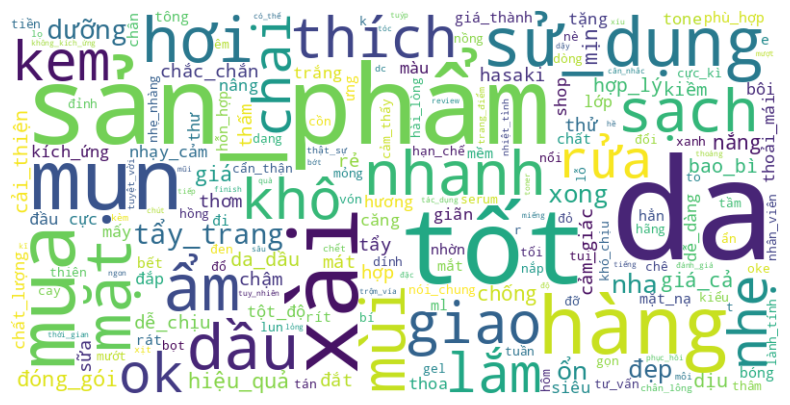

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Tính tần suất các từ
word_counts = Counter(all_words)
print(word_counts)

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
# Đọc file
data1 = pd.read_excel("/content/drive/MyDrive/Final ML/Data_ML.xlsx", engine='openpyxl')
# Use a list to select multiple columns
columns_to_add = data1[['QUALITY','SERVICE','OTHERS','STORE','PACKAGING','PRICE']]
data = pd.concat([data, columns_to_add], axis=1)
data.head(10)

,content_ID,content,lower_content,decoded_content,demojized_content,standardlized_content,cleaned_content,QUALITY,SERVICE,OTHERS,STORE,PACKAGING,PRICE
0,0,Sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,sản phẩm dùng rất tốt phù hợp với da mặt mình,"[sản_phẩm, tốt, phù_hợp, da, mặt]",positive,neutral,neutral,neutral,neutral,neutral
1,1,Mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,mặt nạ đắp hiệu quả thiệt,"[mặt_nạ, đắp, hiệu_quả, thiệt]",positive,neutral,neutral,neutral,neutral,neutral
2,2,Sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,sử dụng dễ dàng rất thỏa mái thư giãn tột độ,"[sử_dụng, dễ_dàng, thỏa_mái, thư, giãn, tột_độ]",positive,neutral,neutral,neutral,neutral,neutral
3,3,Sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,sản phẩm này dùng cực kỳ êm luôn,"[sản_phẩm, cực_kỳ, êm]",positive,neutral,neutral,neutral,neutral,neutral
4,4,Sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,sản phẩm dùng rất tốt,"[sản_phẩm, tốt]",positive,neutral,neutral,neutral,neutral,neutral
5,5,Xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,xài sạch mà không gây khô da sản phẩm rất tốt,"[xài, sạch, khô, da, sản_phẩm, tốt]",positive,neutral,neutral,neutral,neutral,neutral
6,6,Dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,dùng combo cùng serum cực kì ổn,"[combo, serum, cực_kì, ổn]",positive,neutral,neutral,neutral,neutral,neutral
7,7,Sản phẩm tốt Hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,sản phẩm tốt hiệu quả,"[sản_phẩm, tốt, hiệu_quả]",positive,neutral,neutral,neutral,neutral,neutral
8,8,Sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,sử dụng dễ dàng rất thoải mái thư giãn tột độ,"[sử_dụng, dễ_dàng, thoải_mái, thư, giãn, tột_độ]",positive,neutral,neutral,neutral,neutral,neutral
9,9,Đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,đắp vào các đốt mụn sưng giảm hẵn sạch các sợi...,"[đắp, đốt, mụn, sưng, hẵn, sạch, sợi, bã, nhờn]",positive,neutral,neutral,neutral,neutral,neutral


In [19]:
# Save into csv
# Lưu file vào Google Drive
data.to_excel('/content/drive/MyDrive/Final ML/Data_ML(preprocessed).xlsx', index=False, engine='openpyxl')